In [ ]:
# Import libraries. 
!pip install -q git+https://github.com/tensorflow/docs
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [ ]:
# Import data
!wget https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv
dataset = pd.read_csv('insurance.csv')
dataset.tail()

--2022-10-14 19:00:44--  https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv
Resolving cdn.freecodecamp.org (cdn.freecodecamp.org)... 104.26.2.33, 104.26.3.33, 172.67.70.149, ...
Connecting to cdn.freecodecamp.org (cdn.freecodecamp.org)|104.26.2.33|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 50264 (49K) [text/csv]
Saving to: ‘insurance.csv’

insurance.csv       100%[===================>]  49.09K  --.-KB/s    in 0s      

2022-10-14 19:00:45 (136 MB/s) - ‘insurance.csv’ saved [50264/50264]



,age,sex,bmi,children,smoker,region,expenses
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95
1337,61,female,29.1,0,yes,northwest,29141.36


In [ ]:
#Check null
dataset.info()
dataset.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

In [ ]:
#Preprocess : OneHotEncoder for categorical value
from sklearn.preprocessing import OneHotEncoder

categorical_cols = [cname for cname in dataset.columns if dataset[cname].nunique() < 10 and 
                        dataset[cname].dtype == "object"]
numerical_cols = [cname for cname in dataset.columns if dataset[cname].dtype in ['int64', 'float64', 'float']]
OH_encoder=OneHotEncoder(handle_unknown='ignore', sparse=False)
# Apply one-hot encoder to each column with categorical data
OH_cols= pd.DataFrame(OH_encoder.fit_transform(dataset[categorical_cols]))
dataset = pd.concat([dataset[numerical_cols], OH_cols], axis=1)

In [ ]:
#Train-Test Split
from sklearn.model_selection import train_test_split
labels = dataset.pop('expenses')
train_dataset, test_dataset, train_labels, test_labels = train_test_split(dataset, labels, train_size=0.8, test_size=0.2,
                                                                random_state=0)

In [ ]:
#Define neural network model
model = keras.Sequential([
    layers.Dense(20,activation = 'relu'),
    layers.Dropout(0.3),
    layers.Dense(20, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(20, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(1),
])
#Compile model
model.compile(
    optimizer='adam',
    loss='mae',
    metrics=['mae','mse'],
)
#Fit model
model.fit(
    train_dataset, train_labels,
    batch_size=10,
    epochs=200,
    verbose=0,
    )

9/9 - 1s - loss: 3122.2654 - mae: 3122.2654 - mse: 35050836.0000 - 809ms/epoch - 90ms/step
Testing set Mean Abs Error: 3122.27 expenses
You passed the challenge. Great job!
9/9 [==============================] - 0s 3ms/step


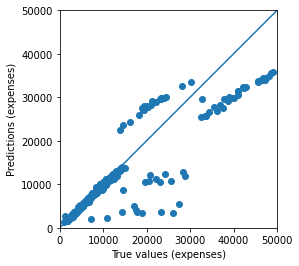

In [ ]:
# RUN THIS CELL TO TEST YOUR MODEL. DO NOT MODIFY CONTENTS.
# Test model by checking how well the model generalizes using the test set.
loss, mae, mse = model.evaluate(test_dataset, test_labels, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} expenses".format(mae))

if mae < 3500:
  print("You passed the challenge. Great job!")
else:
  print("The Mean Abs Error must be less than 3500. Keep trying.")

# Plot predictions.
test_predictions = model.predict(test_dataset).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True values (expenses)')
plt.ylabel('Predictions (expenses)')
lims = [0, 50000]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims,lims)
